In [74]:
!pip install pandas matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [75]:
df = pd.read_csv("ev_dataset.csv")
print("Shape:",df.shape)
df.head()

Shape: (353, 17)


,Row_ID,title,model,battery,price-range,0 - 100,Top Speed,Range*,Efficiency*,Fastcharge*,Germany_price_before_incentives,Netherlands_price_before_incentives,UK_price_after_incentives,Drive_Configuration,Tow_Hitch,Towing_capacity_in_kg,Number_of_seats
0,1,Tesla,Model 3,57.5,104,6.1 sec,201 km/h,415 km,139 Wh/km,690 km/h,"€41,970","€41,990","£39,990",Rear Wheel Drive,Towbar possible,1000.0,5
1,2,Tesla,Model Y,57.5,137,6.9 sec,217 km/h,350 km,164 Wh/km,580 km/h,"€45,970","€45,990","£44,990",Rear Wheel Drive,Towbar possible,1600.0,5
2,3,Tesla,Model Y Long Range Dual Motor,75.0,130,5.0 sec,217 km/h,435 km,172 Wh/km,670 km/h,"€55,970","€52,990","£52,990",All Wheel Drive,Towbar possible,1600.0,5
3,4,Tesla,Model 3 Long Range Dual Motor,75.0,106,4.4 sec,201 km/h,500 km,150 Wh/km,770 km/h,"€50,970","€49,990","£49,990",All Wheel Drive,Towbar possible,1000.0,5
4,5,Tesla,Model Y Long Range RWD,75.0,109,5.9 sec,217 km/h,460 km,163 Wh/km,710 km/h,"€49,970","€49,990",NaN,Rear Wheel Drive,Towbar possible,1600.0,5


In [76]:
#Data_Cleanning

df_clean=df.copy()
#Clean_Range
df_clean["Range_clean"]=(df_clean["Range*"].str.replace(" km","",regex=False))
df_clean["Range_clean"]=pd.to_numeric(df_clean["Range_clean"], errors="coerce")
#clean_Battery
df_clean["Battery_clean"]=pd.to_numeric(df_clean["battery"],errors="coerce")
#Clean_acce
df_clean["Acceleration_clean"]=(
    df_clean["0 - 100"].str.replace(" sec","", regex=False)
)

df_clean["Acceleration_clean"] = pd.to_numeric(df_clean["Acceleration_clean"], errors="coerce")
#topspeed
df_clean["TopSpeed_clean"] = (
    df_clean["Top Speed"]
    .str.replace(" km/h", "", regex=False)
)

df_clean["TopSpeed_clean"] = pd.to_numeric(df_clean["TopSpeed_clean"], errors="coerce")
#clean_fastcharge
df_clean["Fastcharge_clean"] = (
    df_clean["Fastcharge*"]
    .str.replace(" km/h", "", regex=False)
)

df_clean["Fastcharge_clean"] = pd.to_numeric(df_clean["Fastcharge_clean"], errors="coerce")
#clean_Price_ger
df_clean["Germany_price"] = (
    df_clean["Germany_price_before_incentives"]
    .str.replace("€", "", regex=False)
    .str.replace(",", "", regex=False)
)

df_clean["Germany_price"] = pd.to_numeric(df_clean["Germany_price"], errors="coerce")

#clean_Price_NED
df_clean["Netherlands_price"] = (
    df_clean["Netherlands_price_before_incentives"]
    .str.replace("€", "", regex=False)
    .str.replace(",", "", regex=False)
)

df_clean["Netherlands_price"] = pd.to_numeric(df_clean["Netherlands_price"], errors="coerce")
#Clean_Price_UK
df_clean["UK_price"] = (
    df_clean["UK_price_after_incentives"]
    .str.replace("€", "", regex=False)
    .str.replace(",", "", regex=False)
)

df_clean["UK_price"] = pd.to_numeric(df_clean["UK_price"], errors="coerce")
#towing_Capacity
df_clean["Towing_capacity_clean"] = pd.to_numeric(
    df_clean["Towing_capacity_in_kg"], errors="coerce"
)
#Drop_MissingValues

df_clean = df_clean.dropna(
    subset=[
        "Battery_clean",
        "Range_clean",
        "Acceleration_clean",
        "Germany_price"
    ]
)

#result
df_clean.info()
df_clean.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 0 to 350
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Row_ID                               309 non-null    int64  
 1   title                                309 non-null    object 
 2   model                                309 non-null    object 
 3   battery                              309 non-null    float64
 4   price-range                          309 non-null    int64  
 5   0 - 100                              309 non-null    object 
 6   Top Speed                            309 non-null    object 
 7   Range*                               309 non-null    object 
 8   Efficiency*                          309 non-null    object 
 9   Fastcharge*                          309 non-null    object 
 10  Germany_price_before_incentives      309 non-null    object 
 11  Netherlands_price_before_incentives  

,Row_ID,battery,price-range,Towing_capacity_in_kg,Number_of_seats,Range_clean,Battery_clean,Acceleration_clean,TopSpeed_clean,Fastcharge_clean,Germany_price,Netherlands_price,UK_price,Towing_capacity_clean
count,309.000000,309.000000,309.00000,213.000000,309.000000,309.000000,309.000000,309.000000,309.000000,307.000000,309.000000,279.000000,0.0,213.000000
mean,175.106796,74.978317,178.33657,1332.769953,5.100324,397.427184,74.978317,6.425890,190.207120,611.368078,70855.459547,74813.430108,NaN,1332.769953
std,103.182499,20.590510,82.25039,553.733749,0.673935,95.057734,20.590510,2.455019,35.072501,236.147078,42160.524690,46841.058705,NaN,553.733749
min,1.000000,21.300000,90.00000,0.000000,2.000000,135.000000,21.300000,2.200000,125.000000,170.000000,22550.000000,24290.000000,NaN,0.000000
25%,82.000000,60.000000,130.00000,750.000000,5.000000,335.000000,60.000000,4.500000,160.000000,460.000000,45690.000000,44690.000000,NaN,750.000000
50%,176.000000,77.000000,152.00000,1500.000000,5.000000,405.000000,77.000000,6.100000,180.000000,580.000000,56995.000000,58990.000000,NaN,1500.000000
75%,264.000000,90.600000,199.00000,1800.000000,5.000000,470.000000,90.600000,7.900000,210.000000,710.000000,83479.000000,88899.500000,NaN,1800.000000
max,351.000000,123.000000,828.00000,2500.000000,8.000000,665.000000,123.000000,19.100000,325.000000,1290.000000,379015.000000,396275.000000,NaN,2500.000000


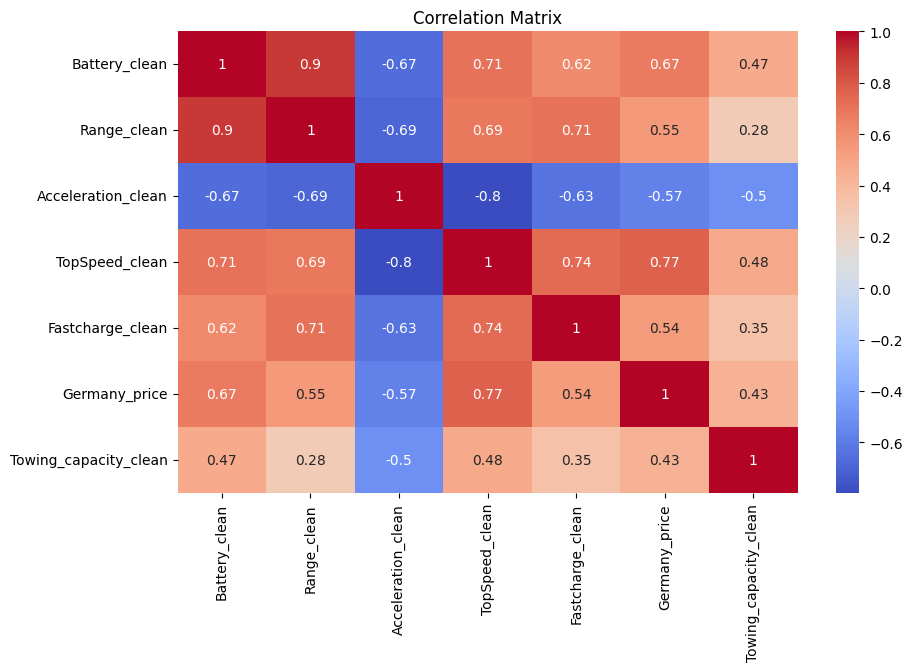

In [77]:
#Correlation_Heatmap
numeric_cols = [
    "Battery_clean",
    "Range_clean",
    "Acceleration_clean",
    "TopSpeed_clean",
    "Fastcharge_clean",
    "Germany_price",
    "Towing_capacity_clean"
]

plt.figure(figsize=(10,6))
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [78]:
#REGRESION_MODELS_Predict_Germany_Ev_Price

#Library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

#Profesional_feature
features = [
    "Battery_clean",
    "Range_clean",
    "Acceleration_clean",
    "TopSpeed_clean",
    "Fastcharge_clean",
    "Towing_capacity_clean",
]

X = df_clean[features]
y = df_clean["Germany_price"]

X_nl = df_nl[features]
y_nl = df_nl["Netherlands_price"]


X = X.dropna()
y = y[X.index]

df_nl = df_clean.dropna(subset=[
    "Netherlands_price",
    "Battery_clean",
    "Range_clean",
    "Acceleration_clean",
    "TopSpeed_clean",
    "Fastcharge_clean",
    "Towing_capacity_clean"
])

#Train/test split Germany
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#Train/test split Netherlands
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(
    X_nl, y_nl, test_size=0.2, random_state=42
)


In [79]:
# Linear Regression Germany
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)

print("Linear Regression Germany MAE:", mean_absolute_error(y_test, lr_preds))
print("Linear Regression Germany R2:", r2_score(y_test, lr_preds))

# Random Forest Germany
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

print("Random Forest Germany MAE:", mean_absolute_error(y_test, rf_preds))
print("Random Forest Germany R2:", r2_score(y_test, rf_preds))

Linear Regression Germany MAE: 11439.66271199815
Linear Regression Germany R2: 0.656540572897683
Random Forest Germany MAE: 6279.974980620155
Random Forest Germany R2: 0.9011054693748461


In [80]:
# Linear Regression Netherlands
lr_nl = LinearRegression()
lr_nl.fit(X_train_nl, y_train_nl)

lr_preds_nl = lr_nl.predict(X_test_nl)

print("Linear Regression Netherlands MAE:", mean_absolute_error(y_test_nl, lr_preds_nl))
print("Linear Regression Netherlands R2:", r2_score(y_test_nl, lr_preds_nl))

# Random Forest Netherlands
rf_nl = RandomForestRegressor(random_state=42)
rf_nl.fit(X_train_nl, y_train_nl)

rf_preds_nl = rf_nl.predict(X_test_nl)

print("Random Forest Netherlands MAE:", mean_absolute_error(y_test_nl, rf_preds_nl))
print("Random Forest Netherlands R2:", r2_score(y_test_nl, rf_preds_nl))


Linear Regression Netherlands MAE: 15442.391099542652
Linear Regression Netherlands R2: 0.6089358517364842
Random Forest Netherlands MAE: 11246.239979166665
Random Forest Netherlands R2: 0.7709170978092658


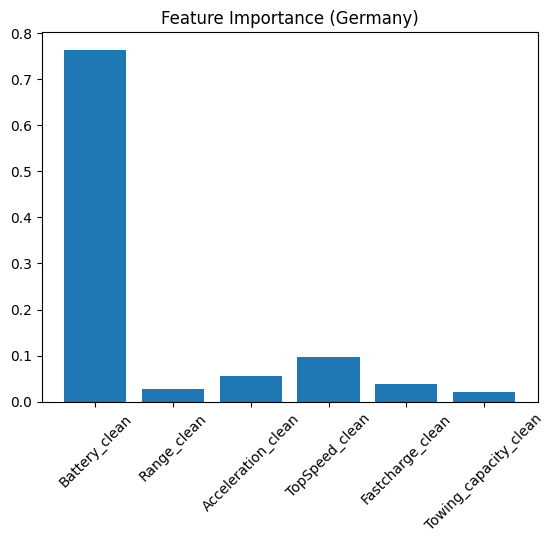

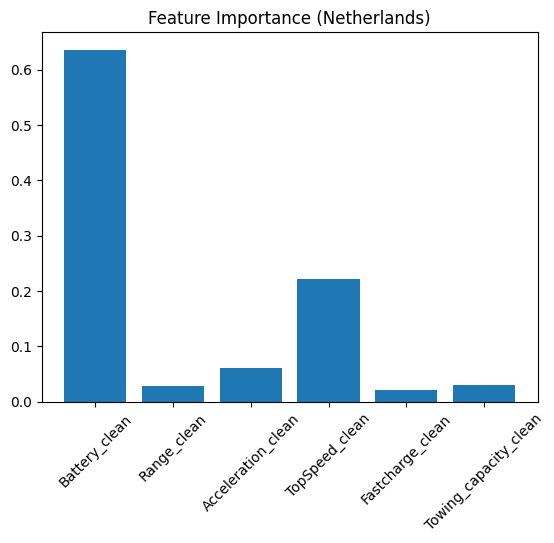

In [81]:
# Features Importance Germany
importances = rf.feature_importances_

plt.figure()
plt.bar(features, importances)
plt.xticks(rotation=45)
plt.title("Feature Importance (Germany)")
plt.show()

# Features Importance Netherlands
importances_nl = rf_nl.feature_importances_

plt.figure()
plt.bar(features, importances_nl)
plt.xticks(rotation=45)
plt.title("Feature Importance (Netherlands)")
plt.show()


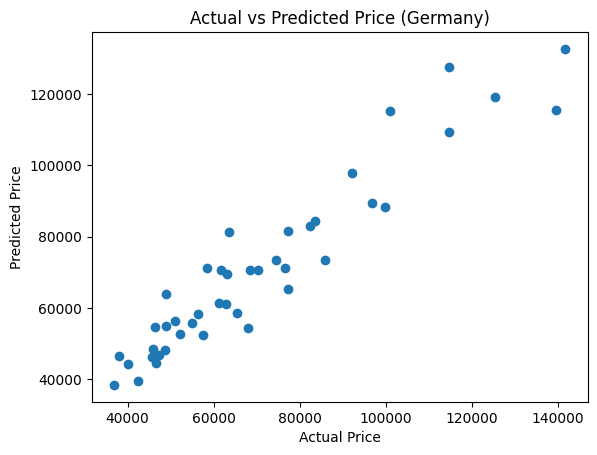

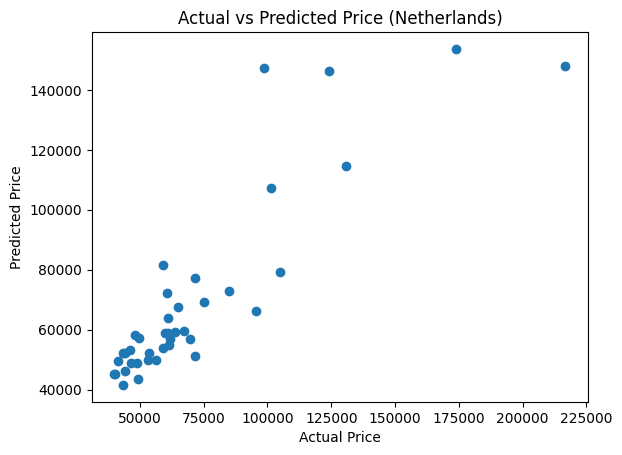

In [82]:
# Actual vs Predicted Plot
plt.figure()
plt.scatter(y_test, rf_preds)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Germany)")
plt.show()

plt.figure()
plt.scatter(y_test_nl, rf_preds_nl)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Netherlands)")
plt.show()


🔍 Key Comparative Insights
1️⃣ Germany Market is More Technically Driven

With R² = 0.90, German EV pricing appears highly dependent on technical specifications such as battery capacity, performance, and range.

This suggests:
Pricing is structured
Lower noise in the market
Fewer external distortions

2️⃣ Netherlands Market Shows Higher Variability

With R² = 0.77, the Dutch market appears less predictable using technical features alone.

This could indicate:
Stronger impact of incentives or taxation
Brand positioning influence
Market demand variations
Policy-driven pricing differences

3️⃣ Higher MAE in Netherlands
MAE difference:
Germany ≈ €6k
Netherlands ≈ €11k
This suggests higher pricing dispersion in the Dutch market

💼 BUSINESS IMPLICATION SECTION
Strategic Implications

EV pricing in Germany is largely specification-driven.

The Netherlands market likely incorporates additional economic or policy factors.

Manufacturers may apply differentiated pricing strategies across EU markets.

Battery capacity remains the dominant pricing driver across both markets.